
Ejercicio: Dataset Iris (multi-clase)
Utiliza el dataset Iris de sklearn.datasets.load_iris.
Pasos:
1. Carga el dataset Iris.
2. Divide en entrenamiento y prueba.
3. Entrena un clasificador (ej. KNeighborsClassifier).
4. Genera la matriz de confusión.
5. Calcula métricas de rendimiento con metrics: accuracy, precision, recall, f1.



#### librerias a usar

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

import tkinter as tk

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149          

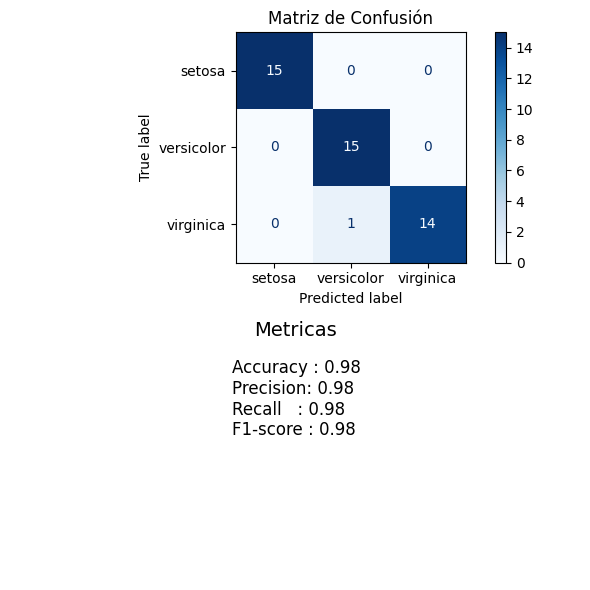

In [3]:
df_iris = load_iris(as_frame=True) # cargamos el dataset de iris
print(df_iris.frame.columns) # muestra las cabeceras de las columnas
print(df_iris['data'])

x = df_iris.data
y = df_iris.target

X_train, X_test, y_train, y_test = train_test_split(x,y, stratify=y,test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predic = knn.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=predic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df_iris.target_names)

Accuracy = accuracy_score(y_test,y_pred=predic)
preci = precision_score(y_test, predic, average='macro')
Recall = recall_score(y_test, predic, average='macro')
F1 = f1_score(y_test, predic, average='macro')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))
disp.plot(cmap="Blues", ax=ax1, colorbar=True)
ax1.set_title("Matriz de Confusión")

# Métricas en el segundo panel
ax2.axis("off")
metrics_text = (
    f"Accuracy : {Accuracy:.2f}\n"
    f"Precision: {preci:.2f}\n"
    f"Recall   : {Recall:.2f}\n"
    f"F1-score : {F1:.2f}"
)
ax2.text(0.39, 0.8, metrics_text, fontsize=12, va="center_baseline")
ax2.set_title("Metricas", fontsize=14, pad=10)

plt.tight_layout()
plt.show()

#ventana simple con tkinter
root = tk.Tk()
root.title('Metricas: ')
tk.Label(root, text=f"Accuracy: {Accuracy :.2f}").pack()
tk.Label(root, text=f"precision score: {preci:.2f}").pack()
tk.Label(root, text=f"Recall Score: {Recall :.2f}").pack()
tk.Label(root, text=f"F1 Score: {F1 :.2f}").pack()

root.mainloop()